In [42]:
%run IDM_helper_functions.ipynb

## Train IDM

In [74]:
from pyddm import Model
from pyddm.models import DriftConstant, DriftLinear, NoiseConstant, BoundConstant, OverlayNonDecision, ICPointSourceCenter
from pyddm.functions import fit_adjust_model, display_model

from pyddm import Fittable, Fitted
from pyddm.models import LossRobustBIC, LossLikelihood, LossRobustLikelihood,LossSquaredError
from pyddm.functions import fit_adjust_model

## Simulate from LCA and fit with IDM

In [60]:
prior = utils.BoxUniform(low=[0, 0.6, -0.4, 0.2], high=[1, 1.5, 0, 0.5])
LCA_parameters = prior.sample((20,))

n_trials = 1000
sim_num = 20

par_fitted = np.zeros((sim_num,4))

In [69]:
for i in range(sim_num):
    print(i)
    model = Model(name='Simple model',
                  drift=DriftLinear(drift=LCA_parameters[i,0], t = 0, x = LCA_parameters[i,2]),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=LCA_parameters[i,1]),
                  overlay=OverlayNonDecision(nondectime=LCA_parameters[i,3]),
                  dx=.001, dt=.001, T_dur=3)
    #display_model(model)
    sol = model.solve()

    samp = sol.resample(n_trials)

    model_fit = Model(name='Simple model (fitted)',
                      drift=DriftLinear(drift=Fittable(minval=0, maxval=1),
                                        t = 0,
                                        x=Fittable(minval=-0.4, maxval=0)),
                      noise=NoiseConstant(noise=1),
                      bound=BoundConstant(B=Fittable(minval=0.6, maxval=1.5)),
                      overlay=OverlayNonDecision(nondectime=Fittable(minval=0.2, maxval=0.5)),
                      dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustLikelihood, verbose=False)
    
    par_fitted[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted[i,2] = np.array(model_fit.parameters()['drift']['x'])
    par_fitted[i,3] = np.array(model_fit.parameters()['overlay']['nondectime'])
    
    print(LCA_parameters[i,:])
    print(par_fitted[i,:])



0


Info: Params [0.95838343 0.11124156 1.26183738 0.36056339] gave 1063.0789519379368


tensor([ 0.8609,  1.3026, -0.2067,  0.3489])
[0.95838343 1.26183738 0.11124156 0.36056339]
1


Info: Params [ 1.30414756  0.02756505  1.46442285 -0.00574067] gave 1032.2761327979222


tensor([ 0.8470,  1.4576, -0.3604,  0.2028])
[ 1.30414756  1.46442285  0.02756505 -0.00574067]
2


Info: Params [ 0.7455719  -0.11364498  0.69401104  0.49400138] gave 663.2966490595408


tensor([ 0.7616,  0.6900, -0.1291,  0.4959])
[ 0.7455719   0.69401104 -0.11364498  0.49400138]
3


Info: Params [ 0.32849888 -0.18536182  0.7910429   0.23296741] gave 1086.306989882013


tensor([ 0.3044,  0.7869, -0.1056,  0.2331])
[ 0.32849888  0.7910429  -0.18536182  0.23296741]
4


Info: Params [ 0.64982369 -0.19946753  0.88081501  0.62523009] gave 1091.160639019671


tensor([ 0.6628,  0.9262, -0.1693,  0.4798])
[ 0.64982369  0.88081501 -0.19946753  0.62523009]
5


Info: Params [0.71932747 0.00844959 0.88026674 1.17782327] gave 985.6103568195165


tensor([ 0.7337,  0.8957, -0.0585,  0.4971])
[0.71932747 0.88026674 0.00844959 1.17782327]
6


Info: Params [ 0.15547717 -0.20664465  0.93899967  0.39399999] gave 1375.9395224408936


tensor([ 0.0999,  1.0658, -0.0566,  0.3506])
[ 0.15547717  0.93899967 -0.20664465  0.39399999]
7


Info: Params [ 0.61768343 -0.07228721  0.94773192  0.42797269] gave 1154.5849114033358


tensor([ 0.5562,  1.0338, -0.0293,  0.4069])
[ 0.61768343  0.94773192 -0.07228721  0.42797269]
8


Info: Params [ 0.89212691 -0.11546035  1.04195069  0.44899067] gave 1036.6301911343126


tensor([ 0.8344,  1.1283, -0.1558,  0.4331])
[ 0.89212691  1.04195069 -0.11546035  0.44899067]
9


Info: Params [ 0.20613306 -0.06676151  0.97099348  0.46899999] gave 1326.340392319728


tensor([ 0.1960,  1.0669, -0.0893,  0.4483])
[ 0.20613306  0.97099348 -0.06676151  0.46899999]
10


Info: Params [ 0.80693192 -0.23484264  0.81200057  0.24792707] gave 867.2899028110089


tensor([ 0.7666,  0.8178, -0.1241,  0.2461])
[ 0.80693192  0.81200057 -0.23484264  0.24792707]
11


Info: Params [ 4.16232463e-01 -6.13731040e-09  1.05449956e+00  8.44107865e-01] gave 1265.6261462289704


tensor([ 0.3582,  1.1078, -0.3514,  0.4849])
[ 4.16232463e-01  1.05449956e+00 -6.13731040e-09  8.44107865e-01]
12


Info: Params [-0.1795416  -0.283693    0.73247222  0.30719156] gave 1009.1131937312301


tensor([ 0.0332,  0.7392, -0.2840,  0.3086])
[-0.1795416   0.73247222 -0.283693    0.30719156]
13


Info: Params [1.03848181 0.16042359 1.36162502 0.43259129] gave 950.9267550879237


tensor([ 0.8046,  1.4436, -0.3514,  0.4044])
[1.03848181 1.36162502 0.16042359 0.43259129]
14


Info: Params [0.85050743 0.02328554 1.23277438 0.31428208] gave 1085.961505972655


tensor([ 0.6571,  1.2833, -0.3236,  0.2939])
[0.85050743 1.23277438 0.02328554 0.31428208]
15


Info: Params [ 0.07647405 -0.36188835  0.90107879  0.36092943] gave 1373.4807416658223


tensor([ 0.0960,  1.0027, -0.2865,  0.3333])
[ 0.07647405  0.90107879 -0.36188835  0.36092943]
16


Info: Params [ 0.38677288 -0.22614279  0.97038497  0.39564211] gave 1314.3855824050734


tensor([ 0.2928,  1.0657, -0.3846,  0.3618])
[ 0.38677288  0.97038497 -0.22614279  0.39564211]
17


Info: Params [0.19761966 0.05437439 1.12916712 0.4246639 ] gave 1133.9942374659615


tensor([ 0.0993,  1.4523, -0.2136,  0.3096])
[0.19761966 1.12916712 0.05437439 0.4246639 ]
18


Info: Params [ 1.66190666e-01 -6.54610075e-04  1.16500477e+00  3.31000240e-01] gave 1166.538116282039


tensor([ 0.1470,  1.4460, -0.3426,  0.2186])
[ 1.66190666e-01  1.16500477e+00 -6.54610075e-04  3.31000240e-01]
19


Info: Params [ 1.21633644 -0.26242991  0.91795125  0.28435275] gave 1167.9845166258092


tensor([ 0.5708,  0.9274, -0.2275,  0.2842])
[ 1.21633644  0.91795125 -0.26242991  0.28435275]


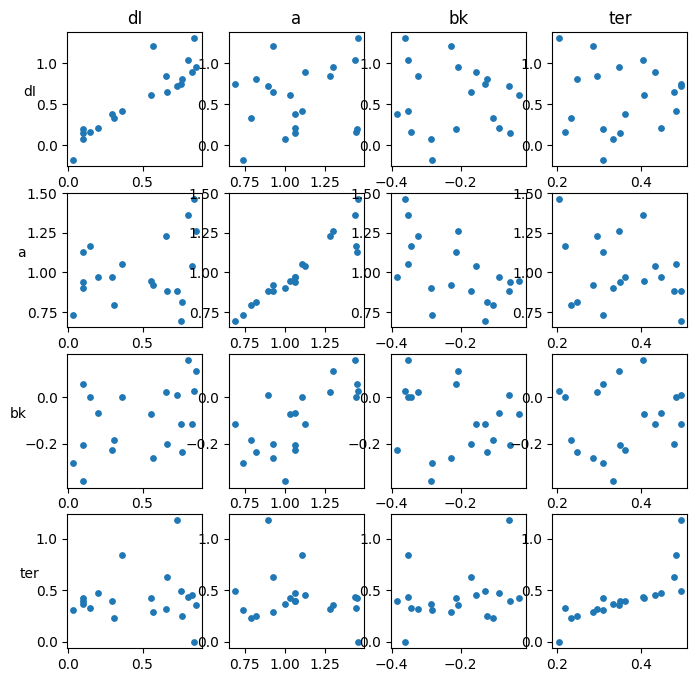

In [70]:
# DE LossRobustLikelihood
#prior = utils.BoxUniform(low=[0, 0.6, -0.4, 0.2], high=[1, 1.5, 0, 0.5])

par_labels = ["dI","a", "bk","ter"]
par_fitted_labels = ["dI","a", "bk","ter"]
sim_fit_plot_all(LCA_parameters[:,:], par_fitted[:,:], par_labels, par_fitted_labels, 
                 s = 15, figsize=(8,8))

In [71]:
for i in range(sim_num):
    print(i)
    model = Model(name='Simple model',
                  drift=DriftLinear(drift=LCA_parameters[i,0], t = 0, x = LCA_parameters[i,2]),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=LCA_parameters[i,1]),
                  overlay=OverlayNonDecision(nondectime=LCA_parameters[i,3]),
                  dx=.001, dt=.001, T_dur=3)
    #display_model(model)
    sol = model.solve()

    samp = sol.resample(n_trials)

    model_fit = Model(name='Simple model (fitted)',
                      drift=DriftLinear(drift=Fittable(minval=0, maxval=1),
                                        t = 0,
                                        x=Fittable(minval=-0.4, maxval=0)),
                      noise=NoiseConstant(noise=1),
                      bound=BoundConstant(B=Fittable(minval=0.6, maxval=1.5)),
                      overlay=OverlayNonDecision(nondectime=Fittable(minval=0.2, maxval=0.5)),
                      dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)
    
    par_fitted[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted[i,2] = np.array(model_fit.parameters()['drift']['x'])
    par_fitted[i,3] = np.array(model_fit.parameters()['overlay']['nondectime'])
    
    print(LCA_parameters[i,:])
    print(par_fitted[i,:])



0


Info: Params [ 0.98660406 -0.16761256  1.2171043   0.35765313] gave 2117.504403770116


tensor([ 0.8609,  1.3026, -0.2067,  0.3489])
[ 0.98660406  1.2171043  -0.16761256  0.35765313]
1


Info: Params [ 9.99999372e-01 -1.86849993e-06  1.39748623e+00  2.52307159e-01] gave 2036.3287636922755


tensor([ 0.8470,  1.4576, -0.3604,  0.2028])
[ 9.99999372e-01  1.39748623e+00 -1.86849993e-06  2.52307159e-01]
2


Info: Params [ 0.76397922 -0.13609202  0.69226364  0.49968306] gave 1290.4185299810524


tensor([ 0.7616,  0.6900, -0.1291,  0.4959])
[ 0.76397922  0.69226364 -0.13609202  0.49968306]
3


Info: Params [ 0.33445094 -0.1447298   0.78687952  0.22952885] gave 2157.040471034876


tensor([ 0.3044,  0.7869, -0.1056,  0.2331])
[ 0.33445094  0.78687952 -0.1447298   0.22952885]
4


Info: Params [ 0.74568486 -0.05769511  0.88818951  0.49821146] gave 1996.5721566204056


tensor([ 0.6628,  0.9262, -0.1693,  0.4798])
[ 0.74568486  0.88818951 -0.05769511  0.49821146]
5


Info: Params [ 0.7673735  -0.08843218  0.87226379  0.49994103] gave 1931.9468293661698


tensor([ 0.7337,  0.8957, -0.0585,  0.4971])
[ 0.7673735   0.87226379 -0.08843218  0.49994103]
6


Info: Params [ 6.78392259e-02 -7.03726627e-07  9.55264799e-01  3.75596783e-01] gave 2700.081210855162


tensor([ 0.0999,  1.0658, -0.0566,  0.3506])
[ 6.78392259e-02  9.55264799e-01 -7.03726627e-07  3.75596783e-01]
7


Info: Params [ 0.6070921  -0.09304783  0.9540388   0.43268401] gave 2399.9629062038853


tensor([ 0.5562,  1.0338, -0.0293,  0.4069])
[ 0.6070921   0.9540388  -0.09304783  0.43268401]
8


Info: Params [ 9.14390813e-01 -1.00922343e-07  1.08890545e+00  4.46668753e-01] gave 2118.714343615895


tensor([ 0.8344,  1.1283, -0.1558,  0.4331])
[ 9.14390813e-01  1.08890545e+00 -1.00922343e-07  4.46668753e-01]
9


Info: Params [ 0.2239413  -0.05562124  0.95764357  0.4728989 ] gave 2671.2005626976947


tensor([ 0.1960,  1.0669, -0.0893,  0.4483])
[ 0.2239413   0.95764357 -0.05562124  0.4728989 ]
10


Info: Params [ 0.85303576 -0.10418378  0.8096814   0.24939261] gave 1652.6147135283604


tensor([ 0.7666,  0.8178, -0.1241,  0.2461])
[ 0.85303576  0.8096814  -0.10418378  0.24939261]
11


Info: Params [ 4.44643525e-01 -1.33905986e-05  1.02664948e+00  4.98526711e-01] gave 2505.700132685291


tensor([ 0.3582,  1.1078, -0.3514,  0.4849])
[ 4.44643525e-01  1.02664948e+00 -1.33905986e-05  4.98526711e-01]
12


Info: Params [ 0.         -0.32157572  0.72450102  0.31386274] gave 2031.1066447999306


tensor([ 0.0332,  0.7392, -0.2840,  0.3086])
[ 0.          0.72450102 -0.32157572  0.31386274]
13


Info: Params [ 0.95657504 -0.05339671  1.29700351  0.45275613] gave 1965.6439145641684


tensor([ 0.8046,  1.4436, -0.3514,  0.4044])
[ 0.95657504  1.29700351 -0.05339671  0.45275613]
14


Info: Params [ 7.28778216e-01 -1.34007363e-07  1.19308734e+00  3.16460392e-01] gave 2335.126619676166


tensor([ 0.6571,  1.2833, -0.3236,  0.2939])
[ 7.28778216e-01  1.19308734e+00 -1.34007363e-07  3.16460392e-01]
15


Info: Params [ 0.10010908 -0.27212689  0.90680813  0.34355497] gave 2702.390657745986


tensor([ 0.0960,  1.0027, -0.2865,  0.3333])
[ 0.10010908  0.90680813 -0.27212689  0.34355497]
16


Info: Params [ 0.36571302 -0.10107256  0.95992231  0.39536877] gave 2565.209278480298


tensor([ 0.2928,  1.0657, -0.3846,  0.3618])
[ 0.36571302  0.95992231 -0.10107256  0.39536877]
17


Info: Params [ 1.85832371e-01 -6.37826504e-08  1.12336095e+00  4.22133662e-01] gave 2308.0302967877183


tensor([ 0.0993,  1.4523, -0.2136,  0.3096])
[ 1.85832371e-01  1.12336095e+00 -6.37826504e-08  4.22133662e-01]
18


Info: Params [ 0.2265533  -0.07385975  1.1083072   0.3384407 ] gave 2396.746899485015


tensor([ 0.1470,  1.4460, -0.3426,  0.2186])
[ 0.2265533   1.1083072  -0.07385975  0.3384407 ]
19


Info: Params [ 0.60203598 -0.30999623  0.87619199  0.2970446 ] gave 2284.0182978454836


tensor([ 0.5708,  0.9274, -0.2275,  0.2842])
[ 0.60203598  0.87619199 -0.30999623  0.2970446 ]


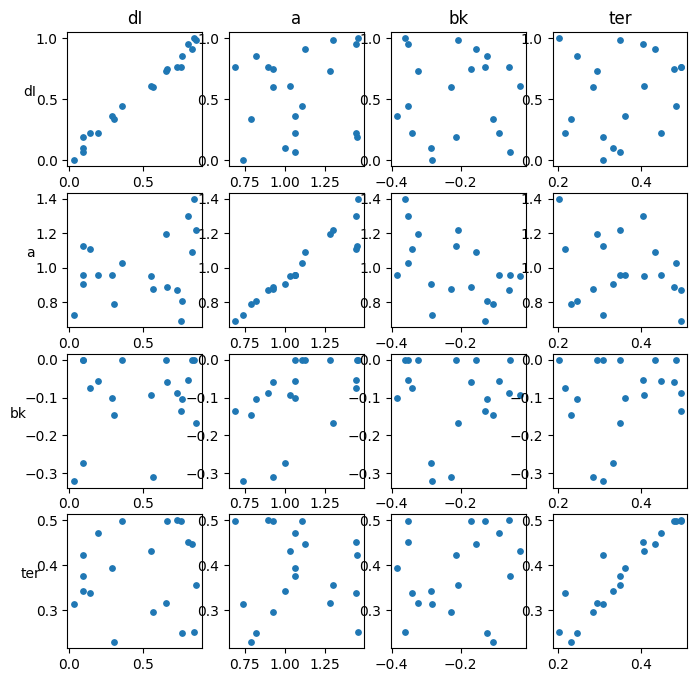

In [72]:
# DE LossRobustBIC
#prior = utils.BoxUniform(low=[0, 0.6, -0.4, 0.2], high=[1, 1.5, 0, 0.5])

par_labels = ["dI","a", "bk","ter"]
par_fitted_labels = ["dI","a", "bk","ter"]
sim_fit_plot_all(LCA_parameters[:,:], par_fitted[:,:], par_labels, par_fitted_labels, 
                 s = 15, figsize=(8,8))

In [75]:
for i in range(sim_num):
    print(i)
    model = Model(name='Simple model',
                  drift=DriftLinear(drift=LCA_parameters[i,0], t = 0, x = LCA_parameters[i,2]),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=LCA_parameters[i,1]),
                  overlay=OverlayNonDecision(nondectime=LCA_parameters[i,3]),
                  dx=.001, dt=.001, T_dur=3)
    #display_model(model)
    sol = model.solve()

    samp = sol.resample(n_trials)

    model_fit = Model(name='Simple model (fitted)',
                      drift=DriftLinear(drift=Fittable(minval=0, maxval=1),
                                        t = 0,
                                        x=Fittable(minval=-0.4, maxval=0)),
                      noise=NoiseConstant(noise=1),
                      bound=BoundConstant(B=Fittable(minval=0.6, maxval=1.5)),
                      overlay=OverlayNonDecision(nondectime=Fittable(minval=0.2, maxval=0.5)),
                      dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossSquaredError, verbose=False)
    
    par_fitted[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted[i,2] = np.array(model_fit.parameters()['drift']['x'])
    par_fitted[i,3] = np.array(model_fit.parameters()['overlay']['nondectime'])
    
    print(LCA_parameters[i,:])
    print(par_fitted[i,:])



0


Info: Params [ 0.82004879 -0.11966742  1.37094165  0.3197012 ] gave 0.000896724401258728


tensor([ 0.8609,  1.3026, -0.2067,  0.3489])
[ 0.82004879  1.37094165 -0.11966742  0.3197012 ]
1


Info: Params [ 0.9087536  -0.36449506  1.4536238   0.24545196] gave 0.0008793206992528433


tensor([ 0.8470,  1.4576, -0.3604,  0.2028])
[ 0.9087536   1.4536238  -0.36449506  0.24545196]
2


Info: Params [ 0.74606933 -0.11173301  0.73098681  0.48576918] gave 0.0009826069941033997


tensor([ 0.7616,  0.6900, -0.1291,  0.4959])
[ 0.74606933  0.73098681 -0.11173301  0.48576918]
3


Info: Params [ 0.25719667 -0.19885091  0.79724928  0.22010022] gave 0.0010173602659184508


tensor([ 0.3044,  0.7869, -0.1056,  0.2331])
[ 0.25719667  0.79724928 -0.19885091  0.22010022]
4


Info: Params [ 0.6141901  -0.09323012  0.92515632  0.48661869] gave 0.0009394073318007208


tensor([ 0.6628,  0.9262, -0.1693,  0.4798])
[ 0.6141901   0.92515632 -0.09323012  0.48661869]
5


Info: Params [ 0.70966606 -0.2859657   0.8802913   0.4982763 ] gave 0.0009616444884545102


tensor([ 0.7337,  0.8957, -0.0585,  0.4971])
[ 0.70966606  0.8802913  -0.2859657   0.4982763 ]
6


Info: Params [ 0.13728179 -0.2437533   1.03094907  0.36776678] gave 0.0009091990933463784


tensor([ 0.0999,  1.0658, -0.0566,  0.3506])
[ 0.13728179  1.03094907 -0.2437533   0.36776678]
7


Info: Params [ 0.53503358 -0.14994401  1.02814901  0.41629978] gave 0.0009941973918012928


tensor([ 0.5562,  1.0338, -0.0293,  0.4069])
[ 0.53503358  1.02814901 -0.14994401  0.41629978]
8


Info: Params [ 0.84170641 -0.27851318  1.14125693  0.42003542] gave 0.0009514925866627622


tensor([ 0.8344,  1.1283, -0.1558,  0.4331])
[ 0.84170641  1.14125693 -0.27851318  0.42003542]
9


Info: Params [ 0.21749078 -0.30750827  1.04075663  0.45844148] gave 0.0008928101821242704


tensor([ 0.1960,  1.0669, -0.0893,  0.4483])
[ 0.21749078  1.04075663 -0.30750827  0.45844148]
10


Info: Params [ 0.72561158 -0.38763634  0.78758216  0.25265293] gave 0.0010394663125229803


tensor([ 0.7666,  0.8178, -0.1241,  0.2461])
[ 0.72561158  0.78758216 -0.38763634  0.25265293]
11


Info: Params [ 0.40030242 -0.18206111  1.14925363  0.48871075] gave 0.0008974989691239718


tensor([ 0.3582,  1.1078, -0.3514,  0.4849])
[ 0.40030242  1.14925363 -0.18206111  0.48871075]
12


Info: Params [ 0.10594565 -0.3364225   0.72028864  0.3100398 ] gave 0.0010074220963696126


tensor([ 0.0332,  0.7392, -0.2840,  0.3086])
[ 0.10594565  0.72028864 -0.3364225   0.3100398 ]
13


Info: Params [ 0.77590275 -0.16412895  1.48713763  0.39300151] gave 0.0008106605230727268


tensor([ 0.8046,  1.4436, -0.3514,  0.4044])
[ 0.77590275  1.48713763 -0.16412895  0.39300151]
14


Info: Params [ 0.5946994  -0.19139632  1.33782619  0.24478514] gave 0.0008360156489768233


tensor([ 0.6571,  1.2833, -0.3236,  0.2939])
[ 0.5946994   1.33782619 -0.19139632  0.24478514]
15


Info: Params [ 0.03720173 -0.13727352  1.02978954  0.34558576] gave 0.0009540602375918277


tensor([ 0.0960,  1.0027, -0.2865,  0.3333])
[ 0.03720173  1.02978954 -0.13727352  0.34558576]
16


Info: Params [ 0.25844425 -0.1414033   1.09812412  0.3674026 ] gave 0.0009053439684523664


tensor([ 0.2928,  1.0657, -0.3846,  0.3618])
[ 0.25844425  1.09812412 -0.1414033   0.3674026 ]
17


Info: Params [ 0.14030136 -0.23515568  1.40871411  0.35963686] gave 0.000642847025881066


tensor([ 0.0993,  1.4523, -0.2136,  0.3096])
[ 0.14030136  1.40871411 -0.23515568  0.35963686]
18


Info: Params [ 0.13706771 -0.31617222  1.48477784  0.21266934] gave 0.0006596884062233979


tensor([ 0.1470,  1.4460, -0.3426,  0.2186])
[ 0.13706771  1.48477784 -0.31617222  0.21266934]
19


Info: Params [ 0.7021817  -0.08524585  0.94768051  0.28736581] gave 0.0009688025687212982


tensor([ 0.5708,  0.9274, -0.2275,  0.2842])
[ 0.7021817   0.94768051 -0.08524585  0.28736581]


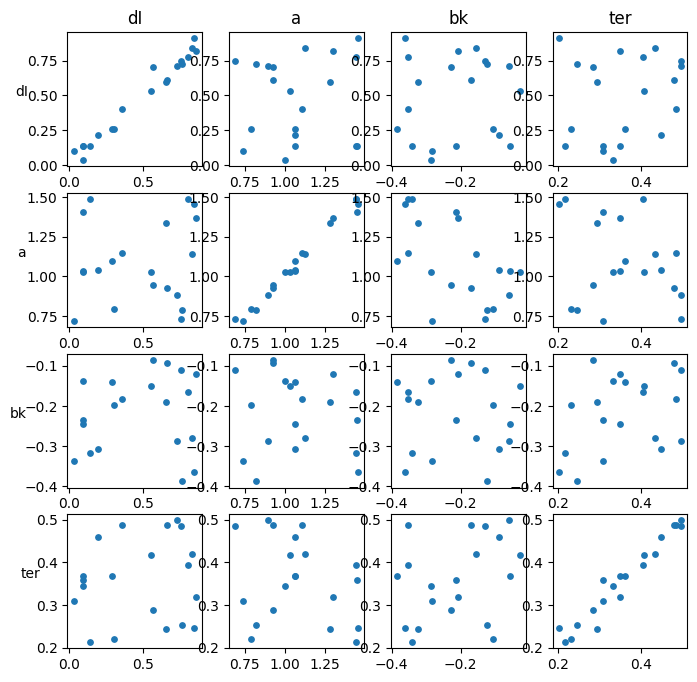

In [76]:
# DE LossSquaredError
#prior = utils.BoxUniform(low=[0, 0.6, -0.4, 0.2], high=[1, 1.5, 0, 0.5])

par_labels = ["dI","a", "bk","ter"]
par_fitted_labels = ["dI","a", "bk","ter"]
sim_fit_plot_all(LCA_parameters[:,:], par_fitted[:,:], par_labels, par_fitted_labels, 
                 s = 15, figsize=(8,8))

In [77]:
for i in range(sim_num):
    print(i)
    model = Model(name='Simple model',
                  drift=DriftLinear(drift=LCA_parameters[i,0], t = 0, x = LCA_parameters[i,2]),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=LCA_parameters[i,1]),
                  overlay=OverlayNonDecision(nondectime=LCA_parameters[i,3]),
                  dx=.001, dt=.001, T_dur=3)
    #display_model(model)
    sol = model.solve()

    samp = sol.resample(n_trials)

    model_fit = Model(name='Simple model (fitted)',
                      drift=DriftLinear(drift=Fittable(minval=0, maxval=1),
                                        t = 0,
                                        x=Fittable(minval=-0.4, maxval=0)),
                      noise=NoiseConstant(noise=1),
                      bound=BoundConstant(B=Fittable(minval=0.6, maxval=1.5)),
                      overlay=OverlayNonDecision(nondectime=Fittable(minval=0.2, maxval=0.5)),
                      dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="simplex",
                     lossfunction=LossSquaredError, verbose=False)
    
    par_fitted[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted[i,2] = np.array(model_fit.parameters()['drift']['x'])
    par_fitted[i,3] = np.array(model_fit.parameters()['overlay']['nondectime'])
    
    print(LCA_parameters[i,:])
    print(par_fitted[i,:])



0


Info: Params [ 0.82865904 -0.09743705  1.39999891  0.29693827] gave 0.0009300295070004793


tensor([ 0.8609,  1.3026, -0.2067,  0.3489])
[ 0.82865904  1.39999891 -0.09743705  0.29693827]
1


Info: Params [ 0.81167587 -0.40943671  1.44304411  0.18054708] gave 0.0008235288333497267


tensor([ 0.8470,  1.4576, -0.3604,  0.2028])
[ 0.81167587  1.44304411 -0.40943671  0.18054708]
2


Info: Params [ 8.67352910e-01 -2.17324658e-07  7.09973185e-01  1.09100435e+00] gave 0.0010054023200829448


tensor([ 0.7616,  0.6900, -0.1291,  0.4959])
[ 8.67352910e-01  7.09973185e-01 -2.17324658e-07  1.09100435e+00]
3


Info: Params [ 0.32529342 -0.42344962  0.82949906  0.13716159] gave 0.0010046238031503293


tensor([ 0.3044,  0.7869, -0.1056,  0.2331])
[ 0.32529342  0.82949906 -0.42344962  0.13716159]
4


Info: Params [ 0.56070816 -0.41329268  0.89379042  0.66015403] gave 0.0009921783324618098


tensor([ 0.6628,  0.9262, -0.1693,  0.4798])
[ 0.56070816  0.89379042 -0.41329268  0.66015403]
5


Info: Params [0.78756877 0.43356965 0.89103087 0.92325451] gave 0.0009757171726015474


tensor([ 0.7337,  0.8957, -0.0585,  0.4971])
[0.78756877 0.89103087 0.43356965 0.92325451]
6


Info: Params [ 0.07513242 -0.18186798  1.03193642  0.3636973 ] gave 0.000909325563080131


tensor([ 0.0999,  1.0658, -0.0566,  0.3506])
[ 0.07513242  1.03193642 -0.18186798  0.3636973 ]
7


Info: Params [ 0.62823005 -0.23954803  1.01996991  0.43199804] gave 0.0009328468663848673


tensor([ 0.5562,  1.0338, -0.0293,  0.4069])
[ 0.62823005  1.01996991 -0.23954803  0.43199804]
8


Info: Params [0.81546296 1.13259382 1.1981682  0.41282338] gave 0.0009108123862896123


tensor([ 0.8344,  1.1283, -0.1558,  0.4331])
[0.81546296 1.1981682  1.13259382 0.41282338]
9


Info: Params [ 0.17696153 -0.121337    1.02509717  0.45803523] gave 0.0009273934212046311


tensor([ 0.1960,  1.0669, -0.0893,  0.4483])
[ 0.17696153  1.02509717 -0.121337    0.45803523]
10


Info: Params [ 0.76021766 -0.12474146  0.81524414  0.25158209] gave 0.0009813414542468426


tensor([ 0.7666,  0.8178, -0.1241,  0.2461])
[ 0.76021766  0.81524414 -0.12474146  0.25158209]
11


Info: Params [ 0.37240506 -0.44708655  1.10140066  0.62344639] gave 0.0008601201731121


tensor([ 0.3582,  1.1078, -0.3514,  0.4849])
[ 0.37240506  1.10140066 -0.44708655  0.62344639]
12


Info: Params [ 0.08834812 -0.50032778 -1.84801848  0.34454793] gave 0.0011146766007464964


tensor([ 0.0332,  0.7392, -0.2840,  0.3086])
[ 0.08834812 -1.84801848 -0.50032778  0.34454793]
13


Info: Params [ 0.76776335 -0.11709752  1.49900431  0.39198743] gave 0.0008235765825988068


tensor([ 0.8046,  1.4436, -0.3514,  0.4044])
[ 0.76776335  1.49900431 -0.11709752  0.39198743]
14


Info: Params [ 0.65089732 -0.34854362  1.27239482  0.29899926] gave 0.0008563500370556824


tensor([ 0.6571,  1.2833, -0.3236,  0.2939])
[ 0.65089732  1.27239482 -0.34854362  0.29899926]
15


Info: Params [ 0.09765062 -0.4501366   1.01619809  0.32853962] gave 0.0008979843941845495


tensor([ 0.0960,  1.0027, -0.2865,  0.3333])
[ 0.09765062  1.01619809 -0.4501366   0.32853962]
16


Info: Params [ 0.34612147 -0.07769439  1.12525517  0.36708471] gave 0.0009053649264037197


tensor([ 0.2928,  1.0657, -0.3846,  0.3618])
[ 0.34612147  1.12525517 -0.07769439  0.36708471]
17


Info: Params [ 0.10309167 -0.16065722  2.00919322  0.2767502 ] gave 0.0006718578299195517


tensor([ 0.0993,  1.4523, -0.2136,  0.3096])
[ 0.10309167  2.00919322 -0.16065722  0.2767502 ]
18


Info: Params [ 0.13344403 -0.22978795  2.7880617   0.02555285] gave 0.0006626642689623397


tensor([ 0.1470,  1.4460, -0.3426,  0.2186])
[ 0.13344403  2.7880617  -0.22978795  0.02555285]
19


Info: Params [ 0.62272818 -0.13456252  0.95499239  0.28798662] gave 0.0009499788190641094


tensor([ 0.5708,  0.9274, -0.2275,  0.2842])
[ 0.62272818  0.95499239 -0.13456252  0.28798662]


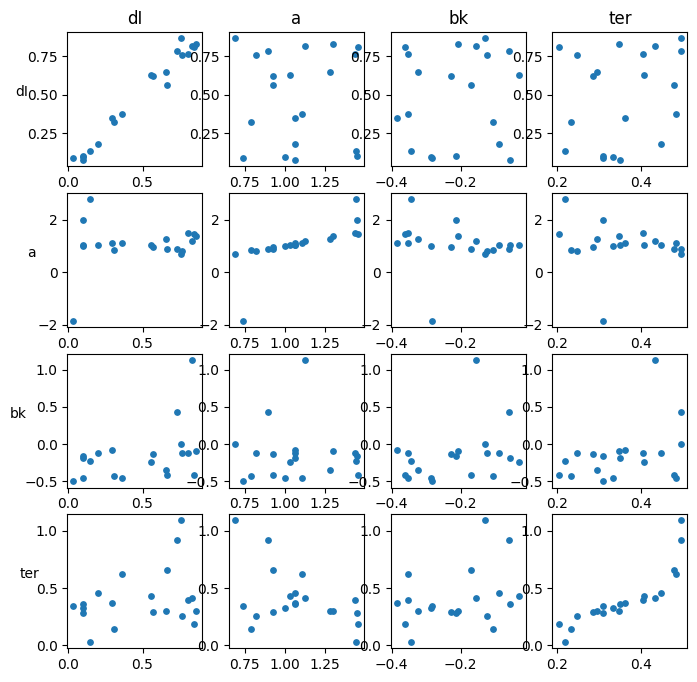

In [78]:

# simplex LossSquaredError
#prior = utils.BoxUniform(low=[0, 0.6, -0.4, 0.2], high=[1, 1.5, 0, 0.5])

par_labels = ["dI","a", "bk","ter"]
par_fitted_labels = ["dI","a", "bk","ter"]
sim_fit_plot_all(LCA_parameters[:,:], par_fitted[:,:], par_labels, par_fitted_labels, 
                 s = 15, figsize=(8,8))

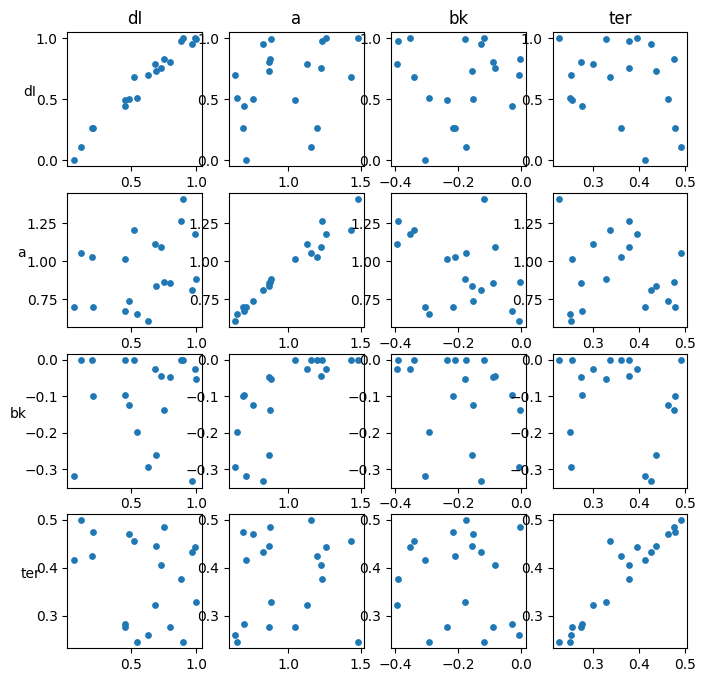

In [56]:
#prior = utils.BoxUniform(low=[0, 0.6, -0.4, 0.2], high=[1, 1.5, 0, 0.5])

par_labels = ["dI","a", "bk","ter"]
par_fitted_labels = ["dI","a", "bk","ter"]
sim_fit_plot_all(LCA_parameters[:,:], par_fitted[:,:], par_labels, par_fitted_labels, 
                 s = 15, figsize=(8,8))

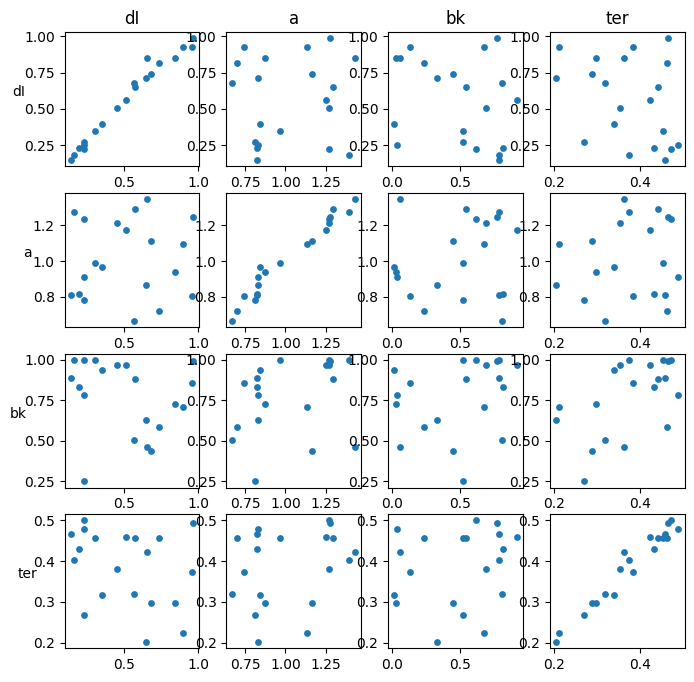

In [52]:
#prior = utils.BoxUniform(low=[0, 0.6, 0, 0.2], high=[1, 1.5, 1, 0.5])

par_labels = ["dI","a", "bk","ter"]
par_fitted_labels = ["dI","a", "bk","ter"]
sim_fit_plot_all(LCA_parameters[:,:], par_fitted[:,:], par_labels, par_fitted_labels, 
                 s = 15, figsize=(8,8))

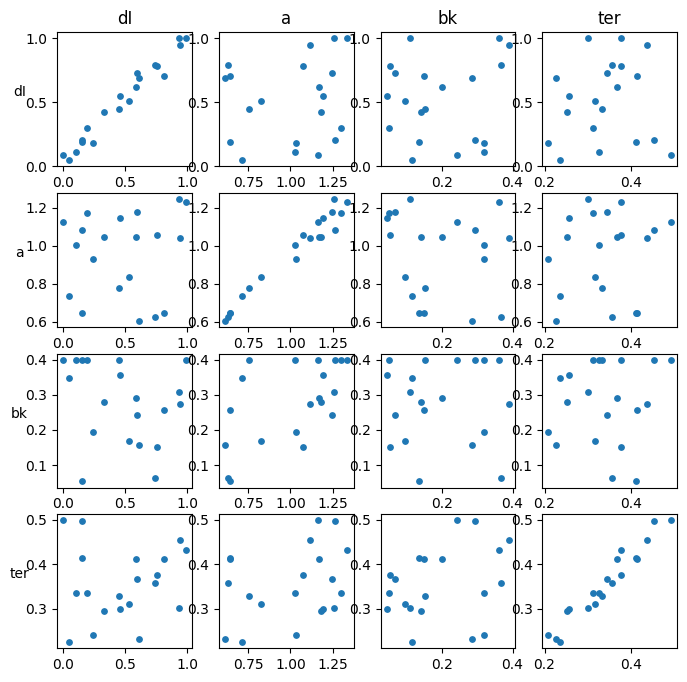

In [47]:
#prior = utils.BoxUniform(low=[0, 0.6, 0, 0.2], high=[1, 1.5, 0.4, 0.5])

par_labels = ["dI","a", "bk","ter"]
par_fitted_labels = ["dI","a", "bk","ter"]
sim_fit_plot_all(LCA_parameters[:,:], par_fitted[:,:], par_labels, par_fitted_labels, 
                 s = 15, figsize=(8,8))

In [16]:
#prior_LCA = utils.BoxUniform(low=[0, 0.6, 0, 0.2], high=[1, 1.5, 0.4, 0.5])
LCA_parameters = prior.sample((20,))

n_trials = 1000
sim_num = 20

par_fitted = np.zeros((sim_num,4))

In [17]:
for i in range(sim_num):
    print(i)
    LCA_o = simul_LCA_full_simp(np.tile(LCA_parameters[i,:], (n_trials,1))) # simulate IDM data
    print(LCA_parameters[i,:])
    print(LCA_o[0:10,:])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(LCA_o)
    mnle_map = mnle_posterior.map()
    print(np.array(mnle_map))
    par_fitted[i,:] = np.array(mnle_map)

0
sim0
tensor([0.1130, 1.1766, 0.0754, 0.2957])
tensor([[3.2957, 1.0000],
        [3.1547, 1.0000],
        [0.6987, 0.0000],
        [2.0267, 1.0000],
        [1.0797, 0.0000],
        [1.4557, 1.0000],
        [1.2607, 1.0000],
        [1.4597, 1.0000],
        [3.2957, 0.0000],
        [1.6017, 0.0000]])
[0.14763747 1.1862088  0.24012712 0.29566646]
1
sim0
tensor([0.5334, 1.3382, 0.2270, 0.4932])
tensor([[1.4242, 0.0000],
        [1.6822, 1.0000],
        [3.3872, 1.0000],
        [1.6292, 0.0000],
        [1.5032, 0.0000],
        [1.2622, 0.0000],
        [2.7382, 0.0000],
        [1.7182, 0.0000],
        [1.6312, 0.0000],
        [2.2082, 0.0000]])
[0.513719   1.4165378  0.23671584 0.49308747]
2
sim0
tensor([0.1547, 1.0036, 0.2230, 0.3357])
tensor([[2.5027, 0.0000],
        [0.8667, 1.0000],
        [1.0947, 1.0000],
        [0.9277, 1.0000],
        [1.4997, 1.0000],
        [1.0347, 1.0000],
        [1.5647, 0.0000],
        [1.5827, 0.0000],
        [1.3427, 0.0000],
        

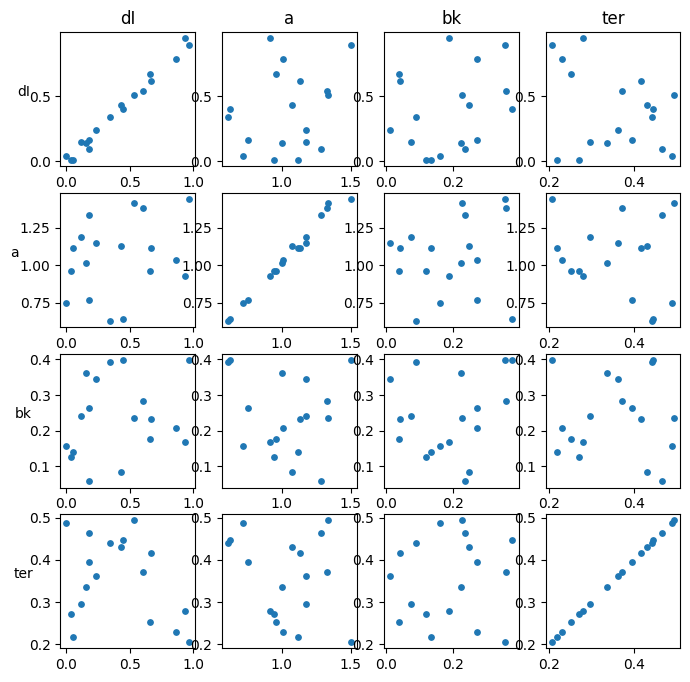

In [18]:
par_labels = ["dI","a", "bk","ter"]
par_fitted_labels = ["dI","a", "bk","ter"]
sim_fit_plot_all(LCA_parameters[:18,:], par_fitted[:18,:], par_labels, par_fitted_labels, 
                 s = 15, figsize=(8,8))

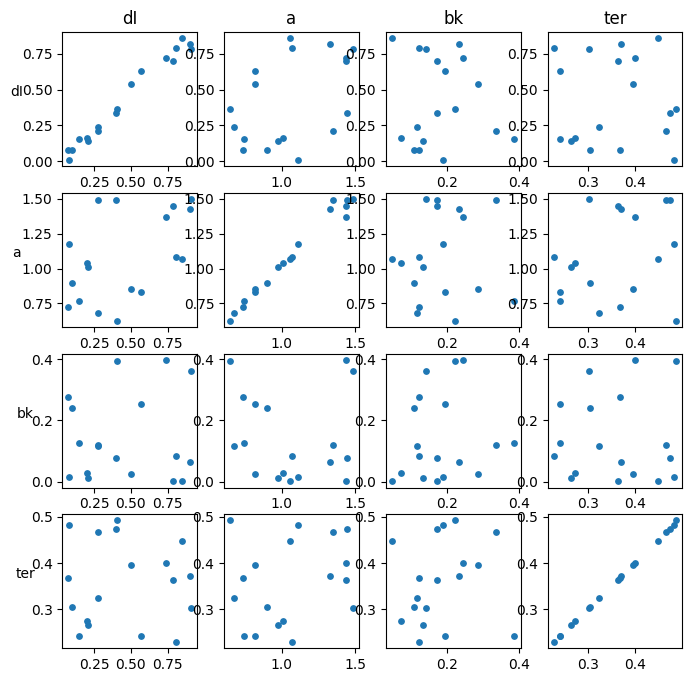

In [14]:
model = Model(name='Simple model',
              drift=DriftLinear(drift=0.5, t = 0, x = 0.2),
              noise=NoiseConstant(noise=1),
              bound=BoundConstant(B=1),
              overlay=OverlayNonDecision(nondectime=.3),
              dx=.001, dt=.001, T_dur=3)
display_model(model)
sol = model.solve()

samp = sol.resample(1000)

model_fit = Model(name='Simple model (fitted)',
                  drift=DriftLinear(drift=Fittable(minval=0, maxval=1),
                                    t = 0,
                                    x=Fittable(minval=0, maxval=0.4)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.6, maxval=1.5)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.2, maxval=0.5)),
                  dx=.001, dt=.001, T_dur=3)

fit_adjust_model(samp, model_fit,
                 fitting_method="differential_evolution",
                 lossfunction=LossRobustBIC, verbose=False)

Model Simple model information:
Drift component DriftLinear:
    linear_xt
    Fixed parameters:
    - drift: 0.500000
    - x: 0.200000
    - t: 0.000000
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.000000
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 1.000000
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNonDecision:
    Add a non-decision by shifting the histogram
    Fixed parameters:
    - nondectime: 0.300000



In [20]:
model_fit.parameters()

{'drift': {'drift': Fitted(0.45980275018610023, minval=0, maxval=1),
  'x': Fitted(0.20597873731422842, minval=0, maxval=0.4),
  't': 0},
 'noise': {'noise': 1},
 'bound': {'B': Fitted(0.90963876686905, minval=0.6, maxval=1.5)},
 'IC': {},
 'overlay': {'nondectime': Fitted(0.3353207579513519, minval=0.2, maxval=0.5)}}

In [39]:
np.array(model_fit.parameters()['drift']['drift'])
np.array(model_fit.parameters()['drift']['x'])
np.array(model_fit.parameters()['bound']['B'])
np.array(model_fit.parameters()['overlay']['nondectime'])



array(0.90963877)

In [35]:
import numpy as np